# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
df= pd.read_csv("5_a.csv")
df["proba"].unique().shape

(10100,)

In [3]:
df["proba"].values.shape

(10100,)

In [4]:
#creating ypred
l=[]
for i in df["proba"]:
    if i>0.5:
        i=1
    elif i<0.5:
        i=0
    l.append(i)
df["ypred"]=l

In [5]:
df["y"].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [6]:
df["ypred"].value_counts()

1    10100
Name: ypred, dtype: int64

In [7]:
TP= 10000
TN= 0
FP= 100
FN= 0
conf_mat= np.array([TN,FN,FP,TP]).reshape(2,2)
precision= TP/(TP+FP)
recall= TP/(TP+FN)
f1= (2*precision*recall)/(precision+recall)
accuracy_score= (TP+TN)/(TP+TN+FP+FN)

In [8]:
conf_mat

array([[    0,     0],
       [  100, 10000]])

In [9]:
f1

0.9950248756218906

In [10]:
accuracy_score

0.9900990099009901

In [11]:
df=df.sort_values("proba",ascending=False)
probab_val=[i for i in df["proba"]]
a=[]
for ind,val in enumerate(df["proba"]):
    #print("value to compare with", val)
    for k in range(len(df["proba"]+1)):
        
        if probab_val[k]>=val:
            
            a.append(1)
        else:
            a.append(0)
            if len(a)==10100:
                df[ind]=a
                a=[]

In [12]:
listpr=[]
lisfpr=[]
pos=df[df["y"]==1]
Total_Pos=pos.shape[0]
neg=df[df["y"]==0]
Total_neg=neg.shape[0]

for column in df.columns[3:]:
    True_positive = ((df['y']==1.0) & (df[column] == 1.0)).sum()
    False_positive= ((df['y']==0.0) & (df[column] == 1.0)).sum()
    
    tpr=True_positive/Total_Pos
    fpr= False_positive/Total_neg
    listpr.append(tpr)
    lisfpr.append(fpr)

listpr= np.array(listpr)
lisfpr= np.array(lisfpr)
np.trapz(listpr, lisfpr)

0.48829900000000004

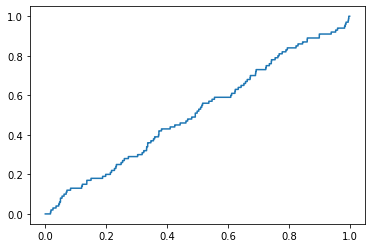

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(listpr,lisfpr)
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [14]:
# write your code
data= pd.read_csv("5_b.csv")
data["y"].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [15]:
#creating ypred
l=[]
for i in data["proba"]:
    if i>0.5:
        i=1
    elif i<0.5:
        i=0
    l.append(i)
data["ypred"]=l

In [16]:
data["proba"].values.shape

(10100,)

In [17]:
data["proba"].unique().shape

(10100,)

In [18]:
data= data.sort_values("proba", ascending=False)
truepos= ((data["y"]==1) & (data["ypred"]==1)).sum()
trueneg= ((data["y"]==0) & (data["ypred"]==0)).sum()
falsepos= ((data["y"]==0) & (data["ypred"]==1)).sum()
falseneg= ((data["y"]==1) & (data["ypred"]==0)).sum()
confmat= np.array([trueneg,falseneg, falsepos, truepos]).reshape(2,2)
precision= truepos/(truepos+falsepos)
recall= truepos/(truepos+falseneg)
f1= (2*precision*recall)/(precision+recall)
acc_score= (truepos+trueneg)/(truepos+trueneg+falseneg+falsepos)

In [19]:
confmat

array([[9761,   45],
       [ 239,   55]])

In [20]:
f1

0.2791878172588833

In [21]:
acc_score

0.9718811881188119

In [22]:
probab_val=[i for i in data["proba"]]
a=[]
for ind,val in enumerate(data["proba"]):
    #print("value to compare with", val)
    for k in range(len(data["proba"]+1)):
        
        if probab_val[k]>=val:
            
            a.append(1)
        else:
            a.append(0)
            if len(a)==10100:
                data[ind]=a
                a=[]


In [23]:
listpr2=[]
lisfpr2=[]
pos=data[data["y"]==1]
Total_Pos=pos.shape[0]
neg=data[data["y"]==0]
Total_neg=neg.shape[0]

for column in data.columns[3:]:
    True_positive = ((data['y']==1.0) & (data[column] == 1.0)).sum()
    False_positive= ((data['y']==0.0) & (data[column] == 1.0)).sum()
    
    tpr2=True_positive/Total_Pos
    fpr2= False_positive/Total_neg
    listpr2.append(tpr2)
    lisfpr2.append(fpr2)

listpr2= np.array(listpr2)
lisfpr2= np.array(lisfpr2)
np.trapz(listpr2, lisfpr2)

0.9376570000000001

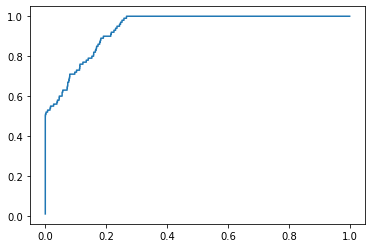

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(lisfpr2,listpr2)
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [59]:
 # write your code
data = pd.read_csv("5_c.csv")
data["prob"].values.shape

(2852,)

In [60]:
data["prob"].unique().shape

(2791,)

In [61]:
data=data.drop_duplicates("prob")
data= data.sort_values("prob", ascending=False)
probab_val=[i for i in data["prob"]]

In [62]:
a=[]
for ind,val in enumerate(data["prob"]):
    for k in range(len(data["prob"]+1)):
        
        if probab_val[k]>=val:
            
            a.append(1)
        else:
            a.append(0)
            if len(a)==2791:
                data[val]=a
                a=[]

In [63]:
A={}
pos=data[data["y"]==1]
Total_Pos=pos.shape[0]
neg=data[data["y"]==0]
Total_neg=neg.shape[0]

for column in data.columns[2:]:
    falseneg= ((data["y"]==1) & (data[column]==0)).sum()
    falsepos= ((data["y"]==0) & (data[column]==1)).sum()
    
    A[column]= 500*falseneg+ 100*falsepos

In [64]:
minval = [key for key in A if A[key] == min(A.values())]
minval

[0.250403339798386]

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [65]:
data= pd.read_csv("5_d.csv")
MSE= ((data["y"]-data["pred"])**2).sum()/data.shape[0]
mape= abs((data["y"]-data["pred"])).sum()/data["y"].sum()
ymean= data["y"].sum()/data.shape[0]
sstot= ((data["y"]-ymean)**2).sum()/data.shape[0]
r2= 1-MSE/sstot
r2

0.9563582786990937

In [66]:
MSE

177.16569974554707

In [67]:
mape

0.1291202994009687